In [4]:
import pandas as pd

In [5]:
def read_gct(file_path, summary=False):
    df = pd.read_csv(file_path, sep='\t', skiprows=2)
    df.set_index(['Name', 'Description'], inplace=True)
    if summary:
        print(f"Imported DataFrame with {df.shape[0]} rows and {df.shape[1]} columns.")

    return df

In [11]:
url = "https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct"

In [13]:
df = read_gct(url, summary=True)

Imported DataFrame with 60 rows and 19 columns.


In [6]:
url = "https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct"

In [7]:
df2 = read_gct(url)

In [8]:
import matplotlib.pyplot as plt

In [9]:
columns_to_plot = [
    'A7-A0DB-normal',
    'A7-A13E-normal',
    'BH-A0B3-primary',
    'BH-A0B5-primary'
]

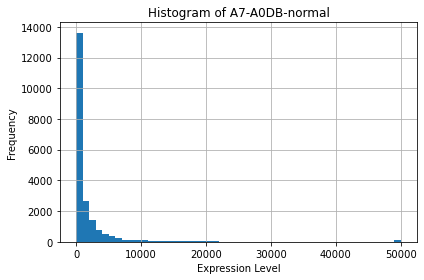

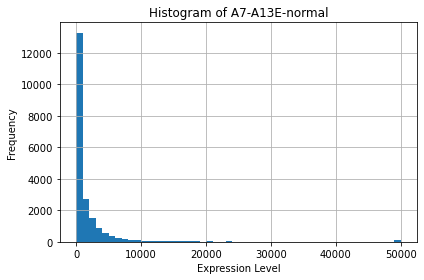

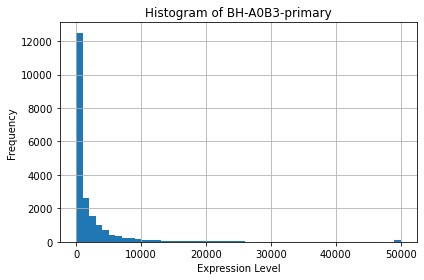

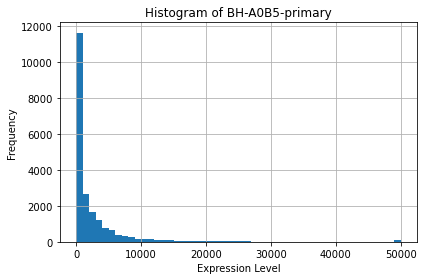

In [10]:
for col in columns_to_plot:
    plt.figure()
    df2[col].clip(upper=50000).hist(bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel("Expression Level")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
summary_stats = pd.DataFrame({
    'Sample name': df2.columns,
    'Mean': df2.mean(),
    'Median': df2.median(),
    'Standard deviation': df2.std()
})
print(summary_stats)

                     Sample name         Mean  Median  Standard deviation
A7-A0CE-normal    A7-A0CE-normal  3308.877255   814.0        12725.531516
A7-A0CH-normal    A7-A0CH-normal  3046.316942   630.0        14145.451194
A7-A0D9-normal    A7-A0D9-normal  2628.131550   350.0        17827.391513
A7-A0DB-normal    A7-A0DB-normal  2354.674445   362.0        13973.914409
A7-A13E-normal    A7-A13E-normal  2380.702593   427.0        13373.496798
A7-A13F-normal    A7-A13F-normal  2493.380215   527.0        12477.592390
A7-A13G-normal    A7-A13G-normal  3509.542463   454.0        30474.663592
AC-A23H-normal    AC-A23H-normal  3396.675312   659.0        20073.855034
AC-A2FB-normal    AC-A2FB-normal  3675.583169   792.0        15577.976864
AC-A2FF-normal    AC-A2FF-normal  3743.660492   935.0        14827.012985
AC-A2FM-normal    AC-A2FM-normal  2714.893663   578.0        11431.472640
BH-A0AU-normal    BH-A0AU-normal  2436.466679   641.0         8961.357233
BH-A0AY-normal    BH-A0AY-normal  2412

In [12]:
df2_filtered = df2[df2.max(axis=1) >= 1000]

In [13]:
filtered_stats = pd.DataFrame({
    'Sample name': df2_filtered.columns,
    'Mean': df2_filtered.mean(),
    'Median': df2_filtered.median()
})
print(filtered_stats)

                     Sample name         Mean  Median
A7-A0CE-normal    A7-A0CE-normal  5058.274447  2130.0
A7-A0CH-normal    A7-A0CH-normal  4665.274373  1720.0
A7-A0D9-normal    A7-A0D9-normal  4030.654502  1150.0
A7-A0DB-normal    A7-A0DB-normal  3608.259552  1150.0
A7-A13E-normal    A7-A13E-normal  3647.490728  1252.0
A7-A13F-normal    A7-A13F-normal  3815.334550  1433.0
A7-A13G-normal    A7-A13G-normal  5381.639979  1491.0
AC-A23H-normal    AC-A23H-normal  5200.198928  1811.0
AC-A2FB-normal    AC-A2FB-normal  5629.312281  2169.0
AC-A2FF-normal    AC-A2FF-normal  5725.120801  2442.0
AC-A2FM-normal    AC-A2FM-normal  4149.738735  1580.0
BH-A0AU-normal    BH-A0AU-normal  3713.193491  1678.0
BH-A0AY-normal    BH-A0AY-normal  3689.122440  1528.0
BH-A0AZ-normal    BH-A0AZ-normal  4907.938557  2201.0
BH-A0B3-normal    BH-A0B3-normal  4395.092798  2012.0
BH-A0B5-normal    BH-A0B5-normal  4805.087063  1265.0
BH-A0B7-normal    BH-A0B7-normal  3566.225441  1613.0
BH-A0B8-normal    BH-A0B8-no

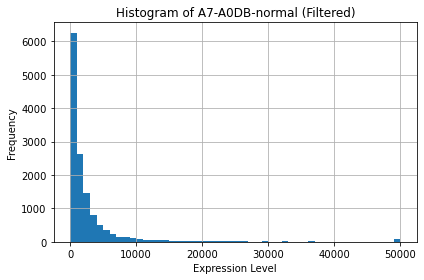

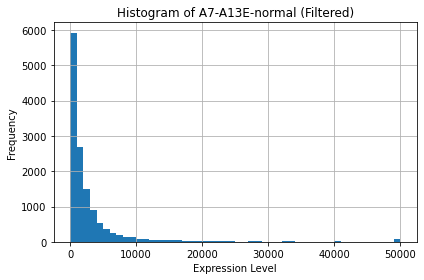

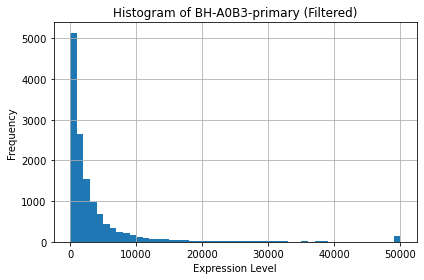

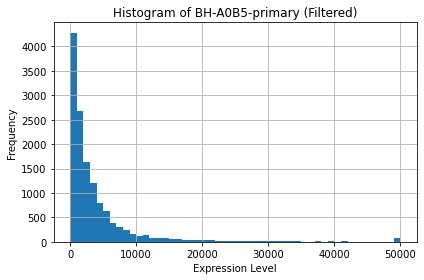

In [14]:
for col in columns_to_plot:
    plt.figure()
    df2_filtered[col].clip(upper=50000).hist(bins=50)
    plt.title(f"Histogram of {col} (Filtered)")
    plt.xlabel("Expression Level")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()